In [1]:
%matplotlib inline
import pickle
import plotly.plotly as py
from plotly.graph_objs import *
import content_stats
from IPython.core.display import Image
from urllib2 import quote
from IPython.display import display




During June 2015 NZRS logged into Netflix from within New Zealand and the USA and observed the content that was avaiable.  From each page the titles on offer were extracted and stored.

Each title was comapred against the OMDd API (http://www.omdbapi.com/) an interace to IMDB data.  Ths allowed each title to be compared against data held within IMDb and the title data to be augmented.

This included the following:

* Plot
* Poster
* Rated
* Language
* Title
* Country
* Writer
* Metascore
* imdbRating
* Director
* Released
* Actors
* Year
* Genre
* Awards
* Runtime
* Type
* Response
* imdbVotes
* imdbID

The data was compiled and the serialised outputs saved for further analysis.  The data can be found here.[[[link to pickles]]]]  This was done using the Python pickle module.


In [2]:
# load previously pickled dictionaries

nz_data = pickle.load(open('nz/all_movies_dict.p', 'rb'))
us_data = pickle.load(open('us/all_movies_dict.p', 'rb'))



From here we can see how large each catalogue of titles is.  Note this only refers to titles not episodes within a title.  Coranation street has over 8,600 episodes, easily dwarfing both the New Zealand and USA catalogue titles.  

Lets see ow large each catalogue was when it was observed.

In [3]:
total_titles_nz = len(nz_data)
total_titles_us = len(us_data)

data = (
    [Bar( x = ['NZ', 'USA'],
          y = [total_titles_nz, total_titles_us],
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix Library Comparison June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Geographic Service'),
    
    )     

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Netflix-Library-Comparison-June-2015')

## Uniqueness of Content ##

Further up you would notice we imported a python module called 'content_stats'.  This is a class offering some methods to process the data we read from the pickled dictionaries above.  Lets look at what we can find out....

Is the New Zealand Netflix service a subset of the USA service or does it have some uniqueness to it.  We can work this out.

In [4]:
# Number of titles are common
common = len(content_stats.Compare_regions(us_data, nz_data).common_titles())
print 'Titles in common between USA and NZ:', common


# Number of titles unique to us
unique_us = len(content_stats.Compare_regions(us_data, nz_data).unique_to_first())
print 'Titles Unique to the USA :', unique_us

# Number of titles unique to nz
unique_nz = len(content_stats.Compare_regions(nz_data, us_data).unique_to_first())
print 'Titles Unique to the NZ :', unique_nz


Titles in common between USA and NZ: 468
Titles Unique to the USA : 3860
Titles Unique to the NZ : 966


We can represent this graphically.

In [5]:
trace1 = Bar(
        y=['Count of Title'],
        x=[unique_nz],
        name='Unique to NZ',
        orientation = 'h',
    
        marker = Marker(
            color = 'rgba(0, 0, 0, 0.6)'        )
    
        )

trace2 = Bar(
        y=['Count of Title'],
        x=[common],
        name='Common Between NZ and USA',
        orientation = 'h',
        marker = Marker(
            color = 'rgba(255, 20, 20, 0.6)' )
    
        )


trace3 = Bar(
        y = ['Count of Title'],
        x = [unique_us],
        name = 'Unique to USA',
        orientation = 'h',
    
        marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
    
        )


data = Data([trace1, trace2, trace3])
layout = Layout(
    barmode='stack')

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Netflix-Library-Comparison-June-2015-Uniqueness of Content')


## Quality of Content ##

Quality by definition is qualitive. Though with enough measure of quality we can hopefully have some quantitive measure of quality, the same way we can hopefully say a five star hotel is normally going to better than a one star hotel.  We know this is not always the case and we do have the [Napoleon Dynamite](http://www.nytimes.com/2008/11/23/magazine/23Netflix-t.html?pagewanted=all&_r=0) effect where the hate and love for a title can be strong.  

To assess quality we looked looked towards IMDB, who make some of their data available via [alternative interfaces](http://www.imdb.com/interfaces) though not in a structured API.  Luckily [OMDB]('http://www.omdbapi.com/') offer a RESTful API that allows querying by title or ID, and returns XML or JSON.

We used this to query the title against OMDB.  Not all returned a useful response, Doctor Who fans will be pleased to know 1995's made for TV movie was not recognised when we queried.

In [6]:
# Count of titles we did not get a response for 
nz_no_response = len([k for (k, v) in nz_data.iteritems() if v['Response'] == 'False'])
print 'Count of NZ titles we did not get a reponse for: ', nz_no_response
print 'Percentage of NZ sites: ', round(float(nz_no_response)/float(len(nz_data))*100), '%'

#US count?/??/


Count of NZ titles we did not get a reponse for:  163
Percentage of NZ sites:  11.0 %


We're pretty happy with these percentages for getting an understanding of the content that is available from a quality perpective.  We might not be able to be absolutely, absolute, but good enough.

We can now look at the difference in quality

## Average Score ##

In [7]:
# Average IMDB score of NZ geographic content
nz_avg_score = content_stats.Title_stats(nz_data).average_score()

# Average IMDB score of NZ geographic content
us_avg_score = content_stats.Title_stats(us_data).average_score()

print 'NZ Average Score via OMDB: ', round(nz_avg_score,2)
print 'US Average Score via OMDB: ', round(us_avg_score,2)


NZ Average Score via OMDB:  6.68
US Average Score via OMDB:  6.37


New Zealand may have a smaller catalgoue but it does seem to have a higher average quality than the US.  We can look at what the top movies are (based on IMDb/OMDb ratings) between the two countries.

##Top 25 Movies##

In [8]:
top_nz_titles = content_stats.Title_stats(nz_data).top_movies(25)

# Truncate to 4
for tup in top_nz_titles[:4]:
    print 'Title :', tup[0]
    print 'Rating: ', tup[1]
    print '========='


Title : The Shawshank Redemption
Rating:  9.3
Title : Human Planet
Rating:  9.3
Title : Frozen Planet
Rating:  9.3
Title : Firefly
Rating:  9.2


This looks a bits naff - lets display an image.

We need to do some trickery as our dictionaries have quoted title names as the keys, so 'The%20Pink%20Panther' instead of 'The Pink Panther', so we need to 'quote' our moviename to get an image.

Title : The Shawshank Redemption
Title : 9.3


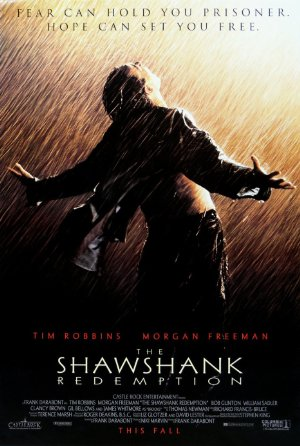

Title : Human Planet
Title : 9.3


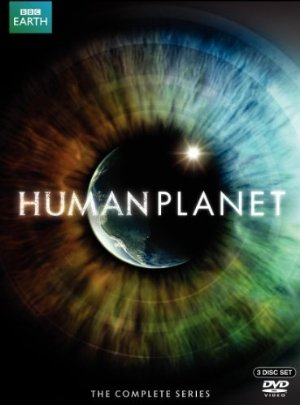

Title : Frozen Planet
Title : 9.3


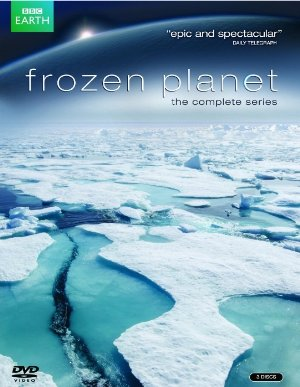

Title : Firefly
Title : 9.2


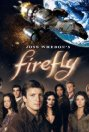

Title : The Godfather
Title : 9.2


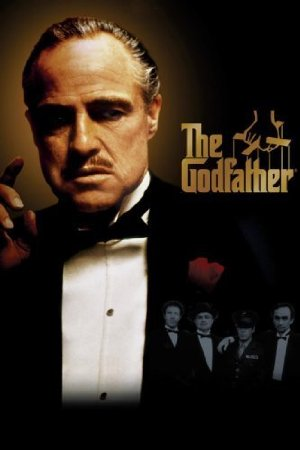

Title : Greg Fleet: Thai Die
Title : 9.2


Title : Fullmetal Alchemist: Brotherhood
Title : 9.1


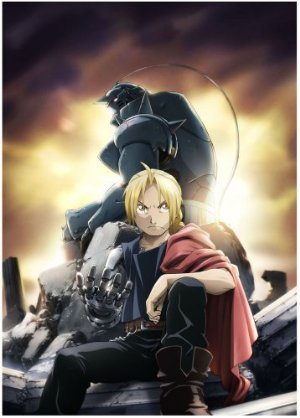

Title : The Godfather: Part II
Title : 9.1


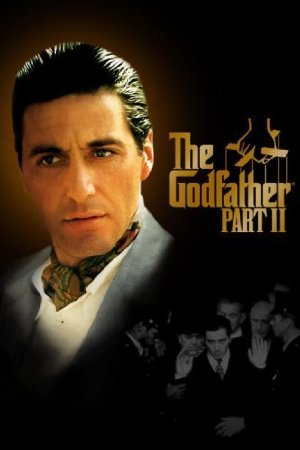

Title : Arrested Development
Title : 9.1


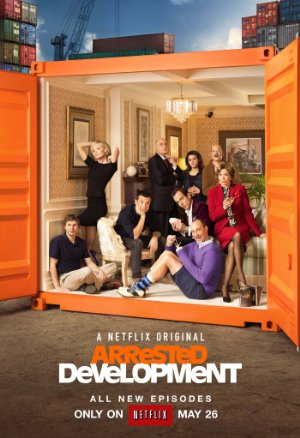

Title : Freaks and Geeks
Title : 9.0


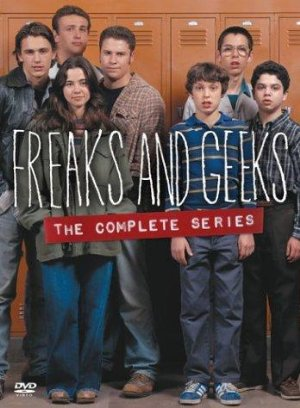

Title : Chef's Table
Title : 9.0


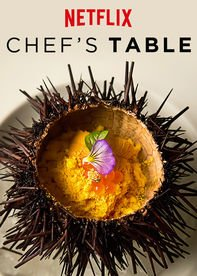

Title : Top Gear
Title : 9.0


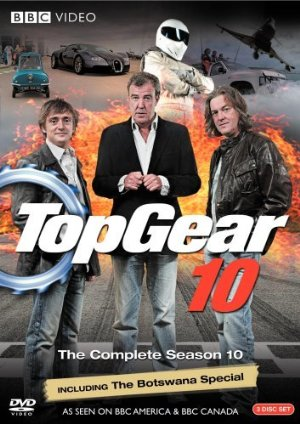

Title : North & South
Title : 9.0


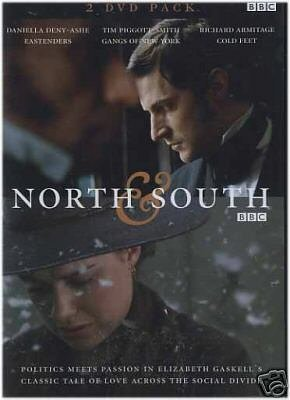

Title : Doctor Who
Title : 8.9


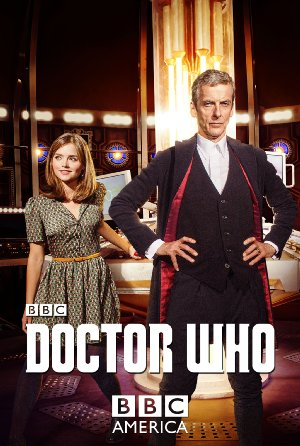

Title : Fight Club
Title : 8.9


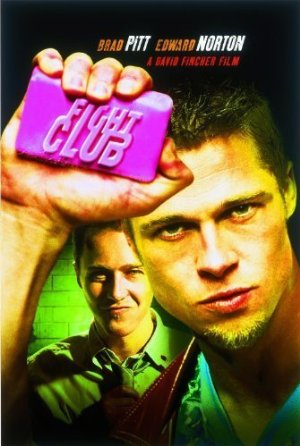

Title : Horrible Histories
Title : 8.9


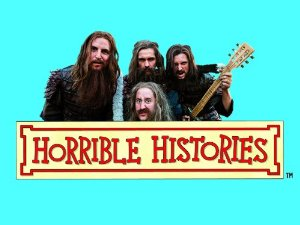

Title : Fawlty Towers
Title : 8.9


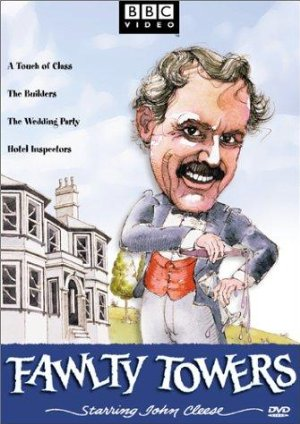

Title : The Good, the Bad and the Ugly
Title : 8.9


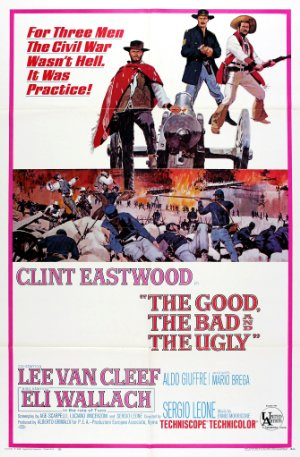

Title : The Lord of the Rings: The Return of the King
Title : 8.9


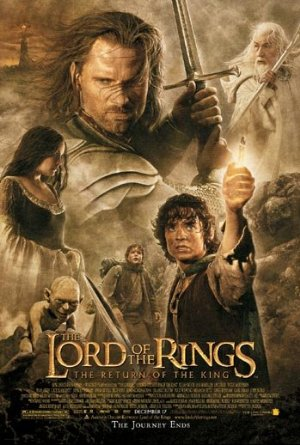

Title : Forensic Files
Title : 8.8


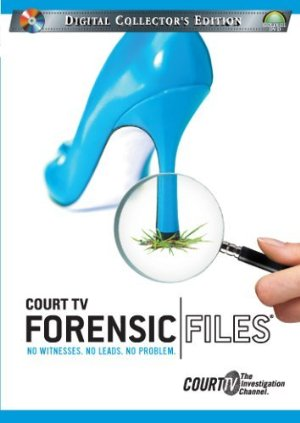

Title : The Lord of the Rings: The Two Towers
Title : 8.8


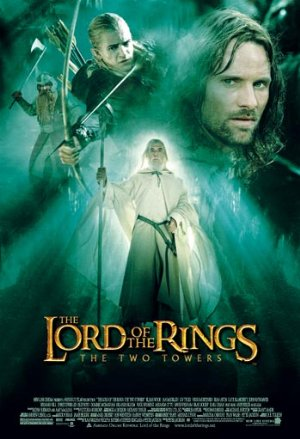

Title : Forrest Gump
Title : 8.8


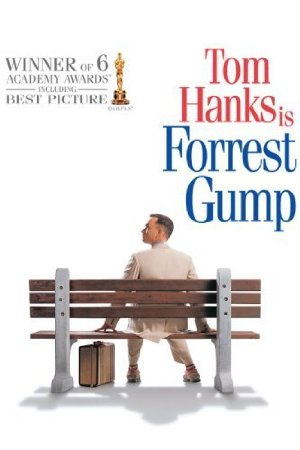

Title : The Lord of the Rings: The Fellowship of the Ring
Title : 8.8


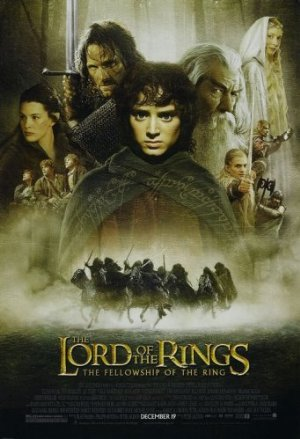

Title : Sarah & Duck
Title : 8.8


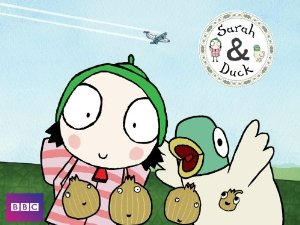

Title : The Thick of It
Title : 8.8


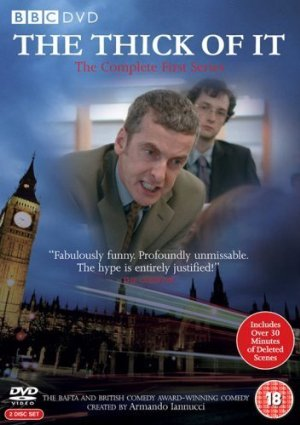

In [9]:
for tup in top_nz_titles:
    print 'Title :', tup[0]
    print 'Title :', tup[1]
    poster = Image(nz_data[quote(tup[0])]['Poster'])
    display(poster)


## USA ##

Title : Generation Earth
Title : 9.1


Title : Fullmetal Alchemist: Brotherhood
Title : 9.1


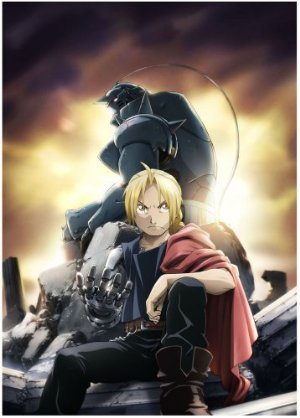

Title : Long Way Round
Title : 9.1


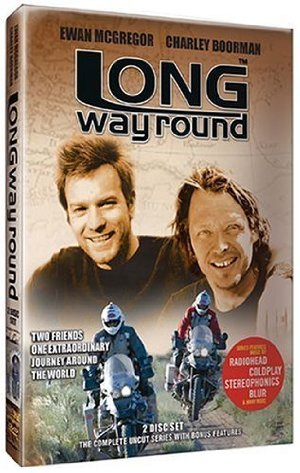

Title : Tomb Raider
Title : 9.1


<IPython.core.display.Image object>

Title : Top Gear
Title : 9.0


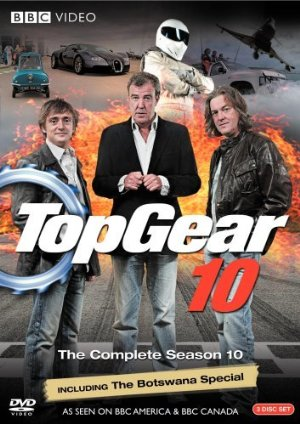

Title : North & South
Title : 9.0


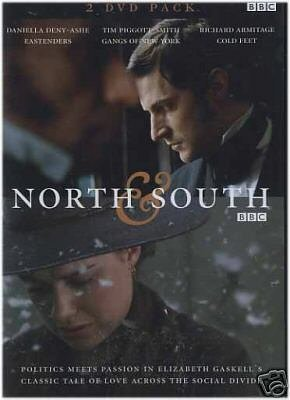

Title : Death Note
Title : 9.0


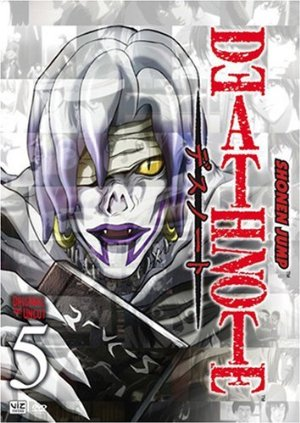

Title : The Life of Birds
Title : 9.0


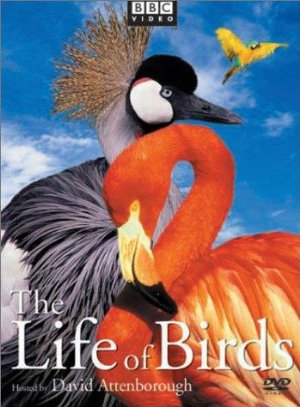

Title : Friends
Title : 9.0


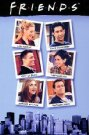

Title : 24/7 Flyers/Rangers: Road to the NHL Winter Classic
Title : 9.0

        |
        | No Poster
        |       
        
Title : Chef's Table
Title : 9.0


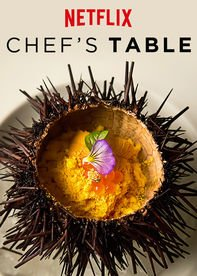

Title : Dexter
Title : 8.9


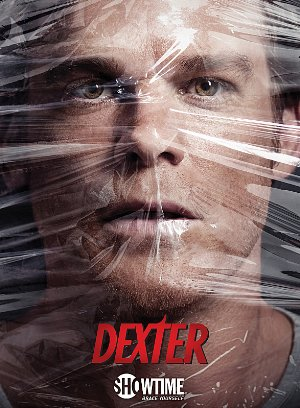

Title : Pulp Fiction
Title : 8.9


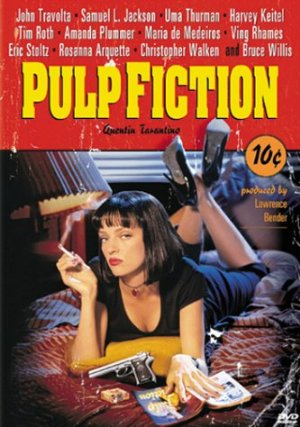

Title : Attack on Titan
Title : 8.9


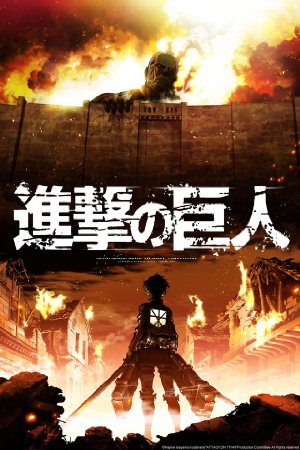

Title : Charlie Don't Surf
Title : 8.9


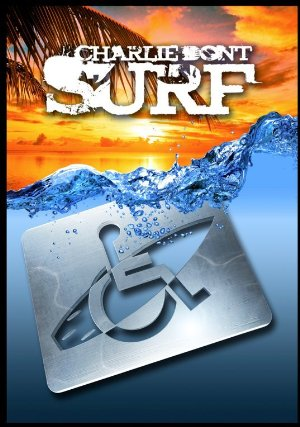

Title : Slugterra: Slug Fu Showdown
Title : 8.8


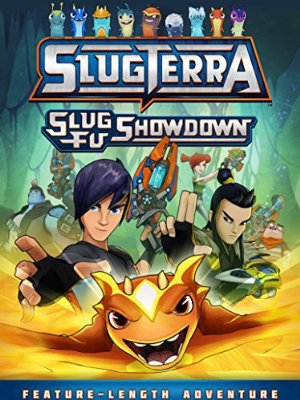

Title : Andaz Apna Apna
Title : 8.8


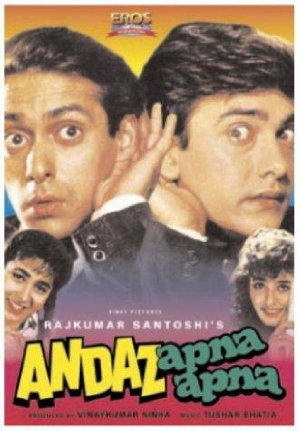

Title : Aerial America
Title : 8.8


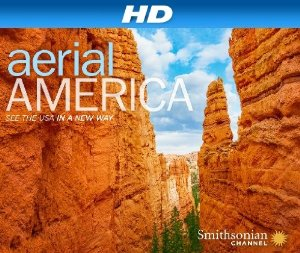

Title : The Phantom of the Opera at the Royal Albert Hall
Title : 8.8


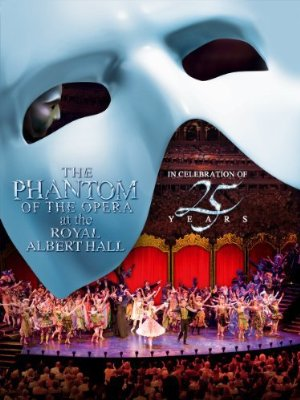

Title : Never Sleep Again: The Elm Street Legacy
Title : 8.8


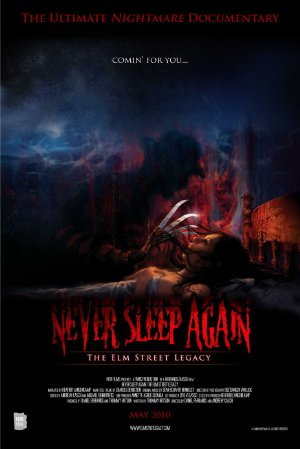

Title : It's Always Sunny in Philadelphia
Title : 8.8


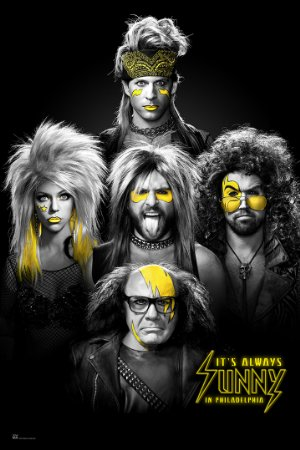

Title : Forrest Gump
Title : 8.8


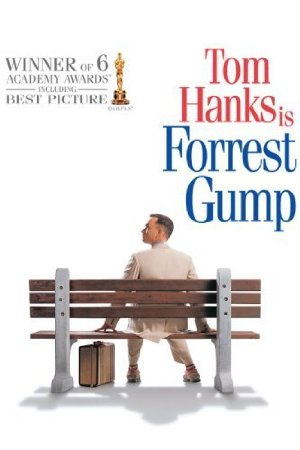

Title : The West Wing
Title : 8.8


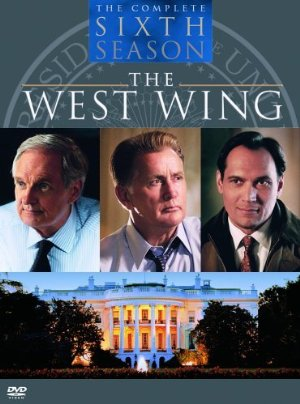

Title : Peaky Blinders
Title : 8.8


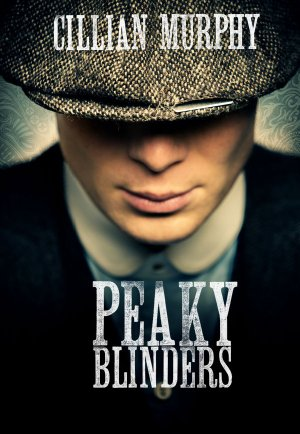

Title : Shameless
Title : 8.7


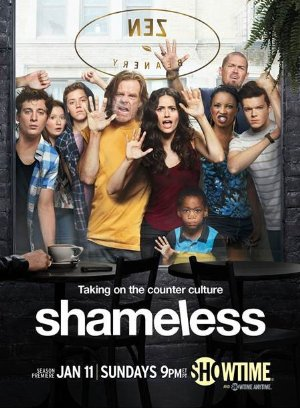

In [10]:
top_us_titles = content_stats.Title_stats(us_data).top_movies(25)

for tup in top_us_titles:
    print 'Title :', tup[0]
    print 'Title :', tup[1]
    try:
        poster = Image(us_data[quote(tup[0])]['Poster'])
        display(poster)
    except:
        print '''
        |
        | No Poster
        |       
        '''


## New Zealand as Country of Origin ##

We can see what New Zealand content is represented within our samples. This includes anything that has the identifier New Zealand in 'Country' via IMDb.  This can include co-productions.

In [11]:
# test
nz_origin_nz = content_stats.Title_stats(nz_data).nz_origin()
nz_origin_us = content_stats.Title_stats(nz_data).nz_origin()


data = (
    [Bar( x = ['NZ', 'USA'],
          y = [nz_origin_nz, nz_origin_us],
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix - Count of Titles with Country of Origin as New Zealand via IMDb',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Geographic Service'),
    
    )     

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Netflix-Library-Comparison-Country-June-2015')


Neck and neck

## Age of Titles ##

We can look at age of titles within the catalogues.  There are some interesting bits to this as age is represented in three ways:
* A single year - this could be a movie that came out in a single year or a series that only ran within a single calendar year
* Across multiple years, for example a series that has run across multiple years (e.g. Friends, 1994–2004)
* Something that is still running (e.g. Orange is the New Black, 2013–)

Initially we could look at year of first release. 



In [12]:
release_year = content_stats.Title_stats(nz_data).year_first_release_count()

x_list = []
y_list = []

for year, count in release_year.iteritems():
    x_list.append(year)
    y_list.append(count)

data = (
    [Bar( x = x_list,
          y = y_list,
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - NZ June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Year'),
    
    )     

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-June-2015')


We can do the same for the USA catalogue.

In [13]:
release_year = content_stats.Title_stats(us_data).year_first_release_count()

x_list = []
y_list = []

for year, count in release_year.iteritems():
    x_list.append(year)
    y_list.append(count)

data = (
    [Bar( x = x_list,
          y = y_list,
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )]
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - US June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Year'),
    
    )     

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-US-June-2015')

But we can look at them side by side.  Lets look at absolute first.

Now lets look relatively:

In [14]:
release_year_us = content_stats.Title_stats(us_data).year_first_release_count()

us_x_list = []
us_y_list = []

for year, count in release_year_us.iteritems():
    us_x_list.append(year)
    us_y_list.append(count)

release_year_nz = content_stats.Title_stats(nz_data).year_first_release_count()

nz_x_list = []
nz_y_list = []

for year, count in release_year_nz.iteritems():
    nz_x_list.append(year)
    nz_y_list.append(count)

trace1 = (
    Bar( x = us_x_list,
          y = us_y_list,
        name = 'USA',
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )
    )

trace2 = (
    Bar( x = nz_x_list,
          y = nz_y_list,
        name = 'NZ',
            marker = Marker(
            color = 'rgba(255, 144, 33, 0.6)')
        )
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - US and NZ June 2015',
    yaxis = YAxis(title = 'Count of Titles'),
    xaxis = XAxis(title = 'Year'),
    barmode='group'
    
    )     

data = Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-US-NZ-June-2015')

In [16]:
total_us_titles = sum(us_y_list)
us_y_list = [(float(count)/(float(total_us_titles)) * 100) for count in us_y_list]

total_nz_titles = sum(nz_y_list)
nz_y_list = [(float(count)/(float(total_nz_titles)) * 100) for count in nz_y_list]

trace1 = (
    Bar( x = us_x_list,
          y = us_y_list,
        name = 'USA',
            marker = Marker(
            color = 'rgba(34, 95, 250, 0.6)')
        )
    )

trace2 = (
    Bar( x = nz_x_list,
          y = nz_y_list,
        name = 'NZ',
            marker = Marker(
            color = 'rgba(255, 144, 33, 0.6)')
        )
    )

layout = Layout(
    title ='Netflix - Year of Titles First Release - US and NZ June 2015 - Percentage',
    yaxis = YAxis(title = 'Percentage of Titles'),
    xaxis = XAxis(title = 'Year'),
    barmode='group'
    
    )     

data = Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Netflix-Library-Comparison-Release-US-NZ-June-2015-relative')


In [ ]:
total_us_titles = sum(us_y_list)
us_y_list = [(float(count)/(float(total_us_titles)) * 100) for count in us_y_list]

total_nz_titles = sum(nz_y_list)
nz_y_list = [(float(count)/(float(total_nz_titles)) * 100) for count in nz_y_list]

## Languages ##